In [14]:
from sklearn import datasets
import matplotlib.pyplot as plt
from itertools import groupby
import numpy as np
from sklearn import cross_validation
%matplotlib inline
iris = datasets.load_iris()

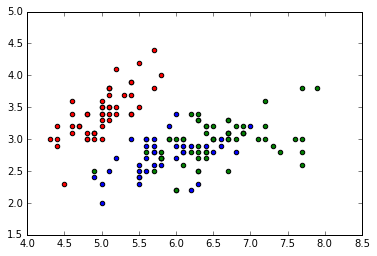

In [40]:
X = iris.data
y = iris.target

colors = { 0: "r", 1: "b", 2: "g" }

for key, grp in groupby(zip(X,y), lambda (_, j): j):
    subX = np.array([ e for (e, _) in grp ])
    plt.scatter(subX[:, 0], subX[:, 1], c=colors[key])
    
plt.show()

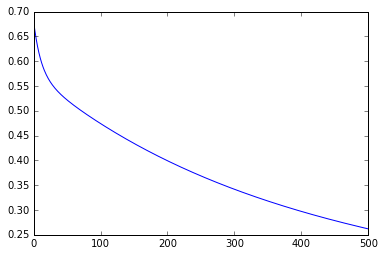

In [8]:
import math

# My own logistic regression with gradient descent from scratch

# the sigmoid function (also known as logistic)
def sigmoid(z):
    return 1.0 /(1.0 + math.exp(-z))

X_ = np.matrix([ np.concatenate(([1], row)) for row in X ])
y_ = np.matrix([1 if i == 0 else 0 for i in y]).transpose()

np.matrix(y).transpose()

# Vectorized functions
sigmoidV = np.vectorize(sigmoid)
logV = np.vectorize(math.log)

# define the error function without regularization param
def J(X, y, theta):
    (m, _) = X.shape
    return (1.0/m) * (-y.transpose() * (logV(sigmoidV(X * theta))) \
                      - (1.0 - y).transpose() * (logV(1.0 - sigmoidV(X * theta))));

def grad(X, y, theta):
    (m, _) = X.shape
    return (1.0/m) * ((sigmoidV(X * theta) - y).transpose() * X).transpose();
    
errorthrs = 0.001

def evaluate(currentError, currentIters, theta, maxIters, iterErrList):
    if (currentError is not None and currentError[0,0] <= errorthrs) or currentIters >= maxIters:
        return iterErrList, currentError, theta
    
    newTheta = theta - 0.003 * grad(X_, y_, theta)
    newErr = J(X_, y_, newTheta)
    iterErrList.append(newErr[0,0])
    return evaluate(newErr, currentIters + 1, newTheta, maxIters, iterErrList)
    
def predict(trainingExamples, theta):
    return sigmoidV(trainingExamples * theta) >= 0.5
    

# add the bias unit to X
def error(X, y, theta):
    return np.mean(predict(X, theta) == y)

    
iterErrList, currentError, theta = evaluate(None, 0, np.matrix([[0],[0],[0],[0],[0]]), 500, [])

plt.plot(range(len(iterErrList)), iterErrList)
plt.show()

#print grad(X_, y_, [[0],[0],[0],[0],[0]])

In [39]:
# Draw decision boundary function

def drawDecisionBoundary(X, y, classifiers):
    
    # import some data to play with
    #iris = datasets.load_iris()
    #X = iris.data[:, :2]  # we only take the first two features. We could
                          # avoid this ugly slicing by using a two-dim dataset
    #y = iris.target

    h = .02  # step size in the mesh

    # we create an instance of SVM and fit out data. We do not scale our
    # data since we want to plot the support vectors
    C = 1.0  # SVM regularization parameter
    svc = svm.SVC(kernel='linear', C=C).fit(X, y)
    rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
    poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
    lin_svc = svm.LinearSVC(C=C).fit(X, y)

    # create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # title for the plots
    titles = ['SVC with linear kernel',
              'LinearSVC (linear kernel)',
              'SVC with RBF kernel',
              'SVC with polynomial (degree 3) kernel']


    for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, m_max]x[y_min, y_max].
        plt.subplot(2, 2, i + 1)
        plt.subplots_adjust(wspace=0.4, hspace=0.4)

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

        # Plot also the training points
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
        plt.xlabel('Sepal length')
        plt.ylabel('Sepal width')
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.xticks(())
        plt.yticks(())
        plt.title(titles[i])

    plt.show()

LR training data score: 0.96
SVM training data score: 0.993333333333
score SVC: 0.98, score Logistic Regression: 0.96


ValueError: X.shape[1] = 2 should be equal to 4, the number of features at training time

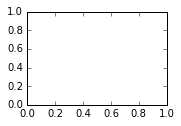

In [41]:
# Logistic regression with the library
from sklearn.linear_model import LogisticRegression
from sklearn import svm

lr = LogisticRegression()
lr.fit(X, y)
print "LR training data score: {0}".format(lr.score(X, y))

# SVM- Seems to fit better the data
svc = svm.SVC(kernel='linear', C=1).fit(X, y)
print "SVM training data score: {0}".format(svc.score(X, y))

# SVC seems to fit the model way better for the training data. Let's do it with cross validation
scoresSVC = cross_validation.cross_val_score(svc, X, y, cv=5)
scoresLR = cross_validation.cross_val_score(lr, X, y, cv=5)

print "score SVC: {0}, score Logistic Regression: {1}".format(scoresSVC.mean(), scoresLR.mean())

#drawDecisionBoundary(X, y, [svc])

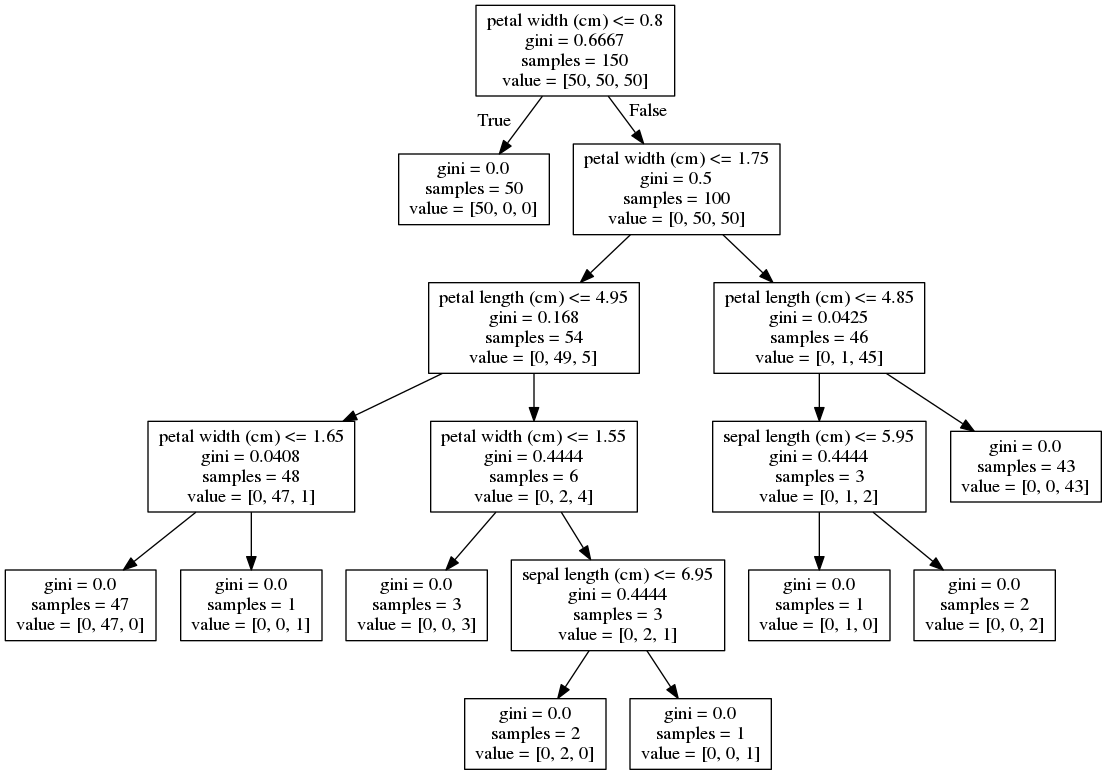

In [18]:
# Decision Tree with Iris
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,y)

from IPython.display import Image  
from sklearn.externals.six import StringIO  
import pydot 

dot_data = StringIO()  
features = iris.feature_names
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=features)  
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [24]:
# Decision tree seems to fit training data perfectly
print clf.score(X, y)

# SVC seems to fit the model way better for the training data. Let's do it with cross validation
scoresDT = cross_validation.cross_val_score(clf, X, y, cv=5)
print "score DT: {0}".format(scoresDT.mean())

# as you can see, with Cross Validation it performs worse than SVM, therefore overfitting the model.
# Let's try with a forest

1.0
score DT: 0.953333333333


Let's try with a Random Forest and see how it performs

In [25]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X, y)

print clf.score(X, y)

scoresRF = cross_validation.cross_val_score(clf, X, y, cv=5)
print "score RF: {0}".format(scoresRF.mean())

0.993333333333
score RF: 0.953333333333


Weird enough, it seems the Random forest still overfits as much as the Decision Tree.